In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data Cleaning

In [2]:
pd.set_option('display.max_columns', None)
df_main = pd.read_csv('diabetic_data.csv')
print(df_main.shape)
df_main.head(10)
df_main[['medical_specialty', 'max_glu_serum', 'A1Cresult', 'metformin','repaglinide','nateglinide','chlorpropamide','glimepiride']].head(15)

(101766, 50)


,medical_specialty,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride
0,Pediatrics-Endocrinology,None,None,No,No,No,No,No
1,?,None,None,No,No,No,No,No
2,?,None,None,No,No,No,No,No
3,?,None,None,No,No,No,No,No
4,?,None,None,No,No,No,No,No
5,?,None,None,No,No,No,No,No
6,?,None,None,Steady,No,No,No,Steady
7,?,None,None,No,No,No,No,No
8,?,None,None,No,No,No,No,No
9,InternalMedicine,None,None,No,No,No,No,No


Text(0.5, 1.0, 'Attributes Missing Rate')

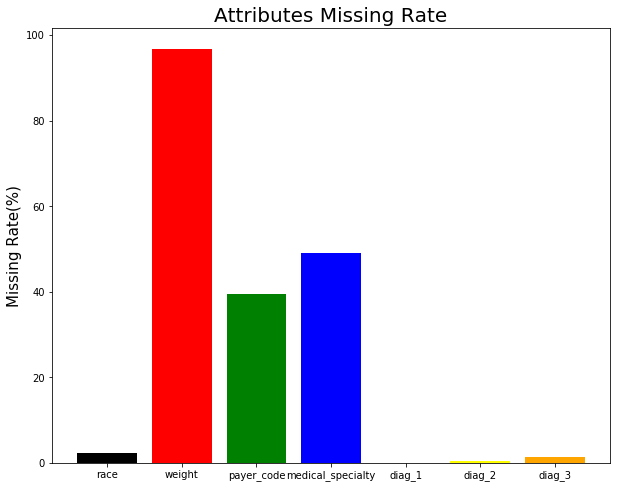

In [3]:
df_main.replace('?', np.nan, inplace=True)
df_missing = df_main[['race','weight','payer_code','medical_specialty','diag_1','diag_2','diag_3']].isnull().sum()/len(df_main)*100
df_missing = pd.DataFrame(df_missing).reset_index()
df_missing.columns = ['Attributes', 'Missing Rate(%)']
figure = plt.figure(figsize=(10,8))
plt.bar(df_missing['Attributes'], df_missing['Missing Rate(%)'], color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'orange', 'purple'])
plt.ylabel('Missing Rate(%)', fontsize=15)
plt.title('Attributes Missing Rate', fontsize=20)

In [4]:
df_missing

,Attributes,Missing Rate(%)
0,race,2.233555
1,weight,96.858479
2,payer_code,39.557416
3,medical_specialty,49.082208
4,diag_1,0.020636
5,diag_2,0.351787
6,diag_3,1.398306


In [5]:
df_clean = df_main.drop(['weight', "payer_code"], axis=1)
df_clean.isnull().sum().head(20)

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
dtype: int64

In [6]:
# clean the medical spetialty
df_clean.fillna(value={'medical_specialty':'Missing'},inplace=True)
# Dropna
df_clean.dropna(inplace=True)
print(df_clean.shape)
df_clean.isnull().sum().head(20)

(98053, 48)


encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
dtype: int64

### Since we plan to do a logistic regression later, we only take the first encounter for each patient to keep each row independent to each other

In [7]:
# used only one encounter per patient;
df_clean.reset_index(drop=True, inplace=True)

# Create a copy for the oringinal clean dataset
df_clean_og = df_clean.copy()

# Create teh data from that we will use for logistic regression later
df_clean.drop_duplicates(subset=['patient_nbr'], inplace=True)

# Check the length of the new data frame, each patient should only have one encounter in the new dataframe
len(df_clean)

68630

# AIC Analysis

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline

In [9]:
# df_new = pd.read_csv('cleaned_data.csv')
# df_new.drop(df_new.columns[0], axis=1, inplace=True)
# df_new.head()
df_clean['readmitted'].replace('<30', 1, inplace=True)
df_clean['readmitted'].replace(['NO', '>30'], 0, inplace=True)
df_new = df_clean.copy()

In [10]:
df_new.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,Missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
1,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,Missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,0
2,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,Missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,0
3,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,Missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,0
4,35754,82637451,Caucasian,Male,[50-60),2,1,2,3,Missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,0


### Label the Variables

In [11]:
def label_diagnosis (i):
#     i= i.strip("V").strip("E")
# #     i = float(i)
    try: 
        i = float(i)
        if i in list(range(390,495)) or i=='785': return 'Circulatory'
        elif i in list(range(460,519)) or i=='786': return 'Respiratory'
        elif i in list(range(520,579)) or i=='787': return 'Digestive'
        elif i>=250 and i<251: return 'Diabetes'
        elif i in list(range(800,999)): return 'Injury'
        elif i in list(range(710,739)): return 'Musculoskeletal'
        elif i in list(range(580,629)) or i=='788': return 'Genitourinary'
        elif i in list(range(140,239)): return 'Neoplasms'
        else: return 'Other'
    except: 
        return 'Other'

In [12]:
df_new['primary_diag'] =df_new['diag_1'].map(label_diagnosis)
df_new['primary_diag'].unique()

array(['Other', 'Neoplasms', 'Circulatory', 'Diabetes', 'Respiratory',
       'Injury', 'Genitourinary', 'Musculoskeletal', 'Digestive'],
      dtype=object)

In [13]:
df_new['primary_diag'].value_counts()

Circulatory        26273
Other              15156
Digestive           6170
Diabetes            5188
Injury              4546
Musculoskeletal     3888
Genitourinary       3392
Neoplasms           2613
Respiratory         1404
Name: primary_diag, dtype: int64

In [14]:
def label_a1c (row):
    if row['A1Cresult'] == 'None': return 'None'
    elif row['A1Cresult'] == 'Norm': return 'Normal'
    elif row['A1Cresult'] == '>8' and row['change']=='No': return 'High, Medical No Change'
    elif row['A1Cresult'] == '>8' and row['change']=='Ch': return 'High, Medical Change'
    else: return 'Other'
df_new['a1c label'] =df_new.apply (lambda row: label_a1c(row),axis=1)

In [15]:
df_new['a1c label'].value_counts()

None                       56349
High, Medical Change        3833
Normal                      3683
Other                       2805
High, Medical No Change     1960
Name: a1c label, dtype: int64

In [16]:
def label_discharge(row):
    if row==1: return 'home'
    else: return 'others'
df_new['discharge'] = df_new['discharge_disposition_id'].map(label_discharge)

In [17]:
def label_age(row):
    if row in ['[10-20)', '[20-30)']: return '<30'
    elif row in ['[30-40)', '[40-50)', '[50-60)']: return '[30,60)'
    else: return '[60,100)'
df_new['Age'] = df_new['age'].map(label_age)

In [18]:
df_new = df_new[df_new['gender']!='Unknown/Invalid']
df_new['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
df_new.head()

In [20]:
df_new['age'].unique()

array(['[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)', '[60-70)',
       '[70-80)', '[80-90)', '[90-100)', '[0-10)'], dtype=object)

In [21]:
categ = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
for col in categ:
    print(col,':',df_new[col].unique())

admission_type_id : [1 2 3 6 4 5 8 7]
discharge_disposition_id : [ 1  3  6  2  5 11  7 25 10 14  4 18  8 12 13 17 16 22 23  9 15 20 28 24
 19 27]
admission_source_id : [ 7  2  4  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
max_glu_serum : ['None' '>300' 'Norm' '>200']
A1Cresult : ['None' '>7' '>8' 'Norm']
metformin : ['No' 'Steady' 'Up' 'Down']
repaglinide : ['No' 'Up' 'Steady' 'Down']
nateglinide : ['No' 'Steady' 'Down' 'Up']
chlorpropamide : ['No' 'Steady' 'Down' 'Up']
glimepiride : ['No' 'Steady' 'Down' 'Up']
acetohexamide : ['No' 'Steady']
glipizide : ['No' 'Steady' 'Up' 'Down']
glyburide : ['No' 'Steady' 'Up' 'Down']
tolbutamide : ['No' 'Steady']
pioglitazone : ['No' 'Steady' 'Up' 'Down']
rosiglitazone : ['No' 'Steady' 'Up' 'Down']
acarbose : ['No' 'Steady' 'Up']
miglitol : ['No' 'Steady' 'Down' 'Up']
troglitazone : ['No' 'Steady']
tolazamide : ['No' 'Steady']
examide : ['No']
citoglipton : ['No']
insulin : ['Up' 'No' 'Steady' 'Down']
glyburide-metformin : ['No' 'Steady' 'Down' 'Up'

## Feature Cleaning

- since we know that examide and citoglipton only have one kind of value so it won't help much in analysis. Thus we drop them
- We can see all these categorical variables has 4 kinds of value (some are binary but still have 2 of these 4):
    No, Down, Steady, Up
    
  We know that the level of these variables are going up, 
  so we mark the "No, Down, Steady, Up" from 0 to 3

In [22]:
df_new.drop(['examide', 'citoglipton', 'glimepiride-pioglitazone', 'metformin-rosiglitazone'], axis=1)

dic_clean = {'No':0, 'Down':1, 'Steady':2, 'Up':3}
for k, v in dic_clean.items():
    df_new.replace(k, v, inplace=True)
df_new['change'].replace('Ch', 1, inplace=True)
df_new['diabetesMed'].replace('Yes', 1, inplace=True)
for col in categ:
    print(col,':',df_new[col].unique())

admission_type_id : [1 2 3 6 4 5 8 7]
discharge_disposition_id : [ 1  3  6  2  5 11  7 25 10 14  4 18  8 12 13 17 16 22 23  9 15 20 28 24
 19 27]
admission_source_id : [ 7  2  4  1  5  6 20  3 17  8  9 14 10 22 11 25 13]
max_glu_serum : ['None' '>300' 'Norm' '>200']
A1Cresult : ['None' '>7' '>8' 'Norm']
metformin : [0 2 3 1]
repaglinide : [0 3 2 1]
nateglinide : [0 2 1 3]
chlorpropamide : [0 2 1 3]
glimepiride : [0 2 1 3]
acetohexamide : [0 2]
glipizide : [0 2 3 1]
glyburide : [0 2 3 1]
tolbutamide : [0 2]
pioglitazone : [0 2 3 1]
rosiglitazone : [0 2 3 1]
acarbose : [0 2 3]
miglitol : [0 2 1 3]
troglitazone : [0 2]
tolazamide : [0 2]
examide : [0]
citoglipton : [0]
insulin : [3 0 2 1]
glyburide-metformin : [0 2 1 3]
glipizide-metformin : [0 2]
glimepiride-pioglitazone : [0]
metformin-rosiglitazone : [0]
metformin-pioglitazone : [0 2]
change : [1 0]
diabetesMed : [1 0]
readmitted : [0 1]


## HbA1c Test Exploratory Analysis 

In [23]:
a1c_count = df_new['A1Cresult'].value_counts()
a1c_count

None    56348
>8       5793
Norm     3683
>7       2805
Name: A1Cresult, dtype: int64

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text yticklabel objects>)

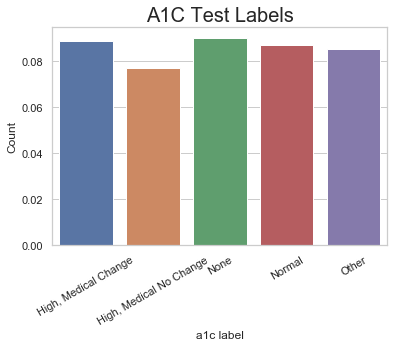

In [24]:
a1c_count_label = df_new.groupby('a1c label')['readmitted'].mean()
sns.set(style='whitegrid')
sns.despine()
sns.barplot(a1c_count_label.index, a1c_count_label.values)
plt.title('A1C Test Labels', fontsize=20)
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.yticks()

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ]),
 <a list of 6 Text yticklabel objects>)

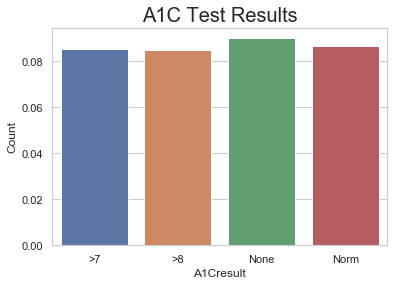

In [25]:
a1c_count = df_new.groupby('A1Cresult')['readmitted'].mean()
sns.despine()
sns.barplot(a1c_count.index, a1c_count.values)
plt.title('A1C Test Results', fontsize=20)
plt.ylabel('Count')
plt.xticks()
plt.yticks()

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000., 35000.,
        40000., 45000.]), <a list of 10 Text yticklabel objects>)

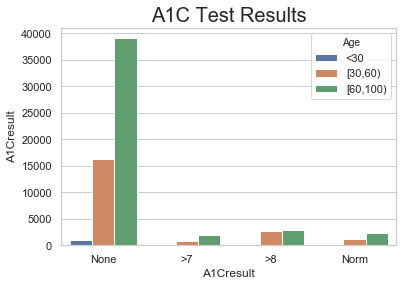

In [26]:
sns.countplot('A1Cresult', hue='Age' ,data=df_new)
plt.title('A1C Test Results', fontsize=20)
plt.ylabel('A1Cresult')
plt.xticks()
plt.yticks()

In [27]:
A1C_df = df_new[['gender', 'race', 'A1Cresult', 'readmitted']]
A1C_df['A1C or not'] = A1C_df['A1Cresult'].replace(['>8', '>7', 'Norm'], 'Test')
A1C_df['A1C or not'].value_counts()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


None    56348
Test    12281
Name: A1C or not, dtype: int64

In [28]:
readmitted_rate = df_new.groupby('A1Cresult')['readmitted'].mean()
readmitted_rate

A1Cresult
>7      0.085205
>8      0.084757
None    0.090083
Norm    0.086886
Name: readmitted, dtype: float64

array([0.08520499, 0.08475747, 0.09008306, 0.08688569])

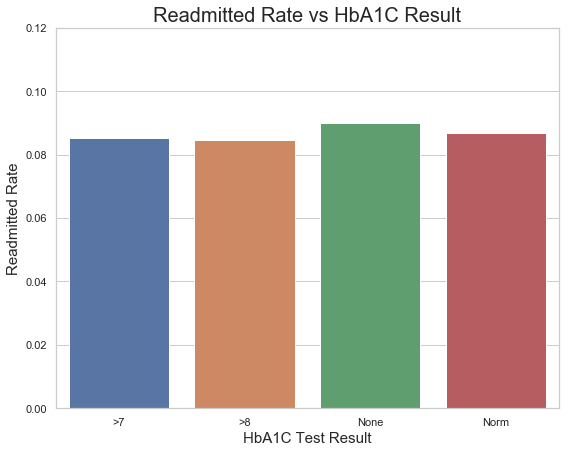

In [29]:
plt.figure(figsize=(9,7))
sns.barplot(readmitted_rate.index, readmitted_rate.values)
plt.title('Readmitted Rate vs HbA1C Result', fontsize=20)
plt.ylabel('Readmitted Rate', fontsize=15)
plt.xlabel('HbA1C Test Result', fontsize=15)
plt.ylim([0,0.12])
readmitted_rate.values

In [30]:
readmitted_rate3 = df_new.groupby('a1c label')['readmitted'].mean()
readmitted_rate3

a1c label
High, Medical Change       0.088703
High, Medical No Change    0.077041
None                       0.090083
Normal                     0.086886
Other                      0.085205
Name: readmitted, dtype: float64

array([0.08520499, 0.08475747, 0.09008306, 0.08688569])

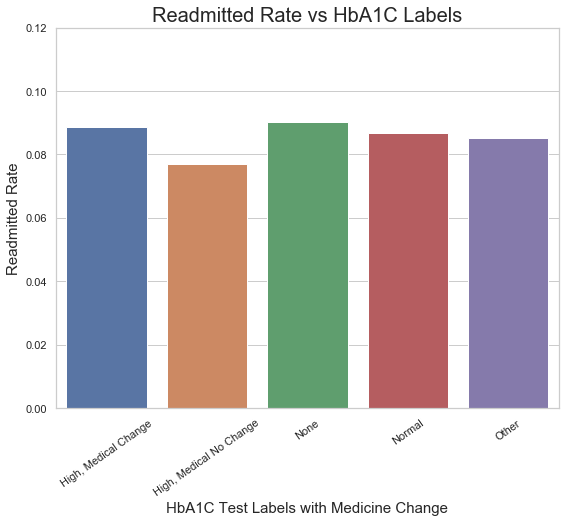

In [31]:
plt.figure(figsize=(9,7))
sns.barplot(readmitted_rate3.index, readmitted_rate3.values)
plt.title('Readmitted Rate vs HbA1C Labels', fontsize=20)
plt.ylabel('Readmitted Rate', fontsize=15)
plt.xlabel('HbA1C Test Labels with Medicine Change', fontsize=15)
plt.ylim([0,0.12])
plt.xticks(rotation=35)
readmitted_rate.values

In [32]:
readmitted_rate2 = A1C_df.groupby('A1C or not')['readmitted'].mean()
readmitted_rate2

A1C or not
None    0.090083
Test    0.085498
Name: readmitted, dtype: float64

Text(0, 0.5, 'Readmitted Rate')

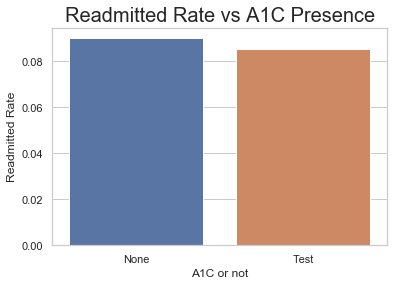

In [33]:
sns.barplot(readmitted_rate2.index, readmitted_rate2.values)
plt.title('Readmitted Rate vs A1C Presence', fontsize=20)
plt.ylabel('Readmitted Rate')

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline, FeatureUnion
import warnings
warnings.filterwarnings('ignore')
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder 

class OneHotEncoder(BaseEstimator, TransformerMixin):
    
    def __init__(self,col):
        self.col = col
                
    def transform(self, X):
        return pd.get_dummies(X[self.col]) 

    def fit(self, X, y=None):
        return self  
    
# Stateless transformer for selecting a specified columns
class DFSubsetSelector(BaseEstimator,TransformerMixin):
    
    def __init__(self,cols):
        self.cols = cols
        
    def transform(self ,X):
        return X[self.cols]
    
    def fit(self, X, y=None):
        return self
    
# Transformer that does min-max transform on the specified columns
class MinMaxTransform(BaseEstimator, TransformerMixin):

    def __init__(self,cols=None):
        self.cols = cols
        self.minVec = np.zeros(len(cols))
        self.maxVec = np.zeros(len(cols))
       
    def transform(self, X):
        X[self.cols] = ((X[self.cols] - self.minVec)/(self.maxVec-self.minVec))
        return X

    def fit(self, X, y=None):
        self.minVec = (df_train[self.cols].min())
        self.maxVec = (df_train[self.cols].max())
        return self

continuous_vars = ['num_procedures','num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'diabetesMed']
cat_vars = ['race','primary_diag',"Age", "gender", 'time_in_hospital', 'discharge', 'a1c label'] 

#DONOT CHANGE THIS
df_train = df_new.sample(frac=0.7,random_state=11)
df_test = df_new.drop(df_train.index)

x_train = df_train[continuous_vars+cat_vars]
y_train = df_train['readmitted']
x_test= df_test[continuous_vars+cat_vars]
y_test = df_test['readmitted']

#building the data-processing pipeline
categorical_feature_pipeline = Pipeline([
                                       ('categorical_selector' ,DFSubsetSelector(cat_vars)),
                                        ('onehot',OneHotEncoder(cat_vars))])
numerical_feature_pipeline = Pipeline([
                                       ('numerical_selector' ,DFSubsetSelector(continuous_vars)),
                                        ('normalization',MinMaxTransform(continuous_vars))])
all_feature_preprocessor= FeatureUnion(transformer_list=[('numerical_preprocessor', numerical_feature_pipeline),
                                                      ('categorical_preprocessor', categorical_feature_pipeline)])

In [35]:
df_new.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted',
       'primary_diag', 'a1c label', 'discharge', 'Age'],
      dtype='object')

In [36]:
spare = ['num_procedures','num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'number_diagnoses', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide','glyburide', 'tolbutamide', 'pioglitazone', 
        'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
                   'metformin-pioglitazone', 'change', 'diabetesMed']

## Preparing the dataset

In [37]:
def oneHotEncoder(X, col):
        return pd.get_dummies(X[col])
df_conVars_train = oneHotEncoder(x_train, cat_vars)

In [38]:
def MinMaxTransform(conti_variable, X):
    minVec = X[conti_variable].min()
    maxVec = X[conti_variable].max()
    X[conti_variable] = ((X[conti_variable] - minVec)/(maxVec-minVec))
    return X[conti_variable] 
df_catVars_train = MinMaxTransform(continuous_vars, x_train)

In [39]:
X_train = df_conVars_train.join(df_catVars_train)
X_train.head()

,time_in_hospital,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,primary_diag_Circulatory,primary_diag_Diabetes,primary_diag_Digestive,primary_diag_Genitourinary,primary_diag_Injury,primary_diag_Musculoskeletal,primary_diag_Neoplasms,primary_diag_Other,primary_diag_Respiratory,Age_<30,"Age_[30,60)","Age_[60,100)",gender_Female,gender_Male,discharge_home,discharge_others,"a1c label_High, Medical Change","a1c label_High, Medical No Change",a1c label_None,a1c label_Normal,a1c label_Other,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
49417,5,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.333333,0.2375,0.000000,0.0,0.000000,0.461538,1.0
35262,2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0.000000,0.0500,0.000000,0.0,0.000000,0.076923,1.0
75897,4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0.166667,0.0750,0.000000,0.0,0.000000,0.461538,1.0
44526,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0.833333,0.2375,0.000000,0.0,0.083333,0.307692,0.0
36164,14,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.666667,0.1625,0.028571,0.0,0.000000,0.230769,0.0


In [40]:
df_conVars_test = oneHotEncoder(x_test, cat_vars)
df_catVars_test = MinMaxTransform(continuous_vars, x_test)
X_test = df_conVars_test.join(df_catVars_test)
X_test.head()

,time_in_hospital,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,primary_diag_Circulatory,primary_diag_Diabetes,primary_diag_Digestive,primary_diag_Genitourinary,primary_diag_Injury,primary_diag_Musculoskeletal,primary_diag_Neoplasms,primary_diag_Other,primary_diag_Respiratory,Age_<30,"Age_[30,60)","Age_[60,100)",gender_Female,gender_Male,discharge_home,discharge_others,"a1c label_High, Medical Change","a1c label_High, Medical No Change",a1c label_None,a1c label_Normal,a1c label_Other,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,diabetesMed
0,3,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0.000000,0.239437,0.0,0.0,0.0,0.461538,1.0
3,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,0.000000,0.098592,0.0,0.0,0.0,0.153846,1.0
4,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1.000000,0.211268,0.0,0.0,0.0,0.461538,1.0
5,4,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0.166667,0.281690,0.0,0.0,0.0,0.307692,1.0
8,12,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0.500000,0.239437,0.0,0.0,0.0,0.384615,1.0


In [41]:
import statsmodels.api as sm
sm_model = sm.Logit(y_train, X_train)
sm_result = sm_model.fit()
print(sm_result.summary2())

Optimization terminated successfully.
         Current function value: 0.293707
         Iterations 8
                                         Results: Logit
Model:                        Logit                      Pseudo R-squared:           0.027      
Dependent Variable:           readmitted                 AIC:                        28277.3692 
Date:                         2019-12-04 20:36           BIC:                        28531.9831 
No. Observations:             48040                      Log-Likelihood:             -14110.    
Df Model:                     28                         LL-Null:                    -14500.    
Df Residuals:                 48011                      LLR p-value:                2.2410e-146
Converged:                    1.0000                     Scale:                      1.0000     
No. Iterations:               8.0000                                                            
------------------------------------------------------------------

## Logistic Regression

In [42]:
# Build logistic classifier
model_logistics = LogisticRegression(class_weight='balanced')
clf_Logistics = Pipeline([('feature processor', all_feature_preprocessor),
                        ('Logistics clasifier', model_logistics)])
# Fit the model
clf_Logistics.fit(x_train, y_train)
pred_logi = clf_Logistics.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred_logi).ravel()

#print(tn, fp, fn, tp)
print(tp/(tp+fn))
confusion_matrix(y_test, pred_logi)

0.5487066593285636


array([[11497,  7275],
       [  820,   997]], dtype=int64)

In [43]:
model_logistics2 = LogisticRegression()
model_logistics2.fit(X_train, y_train)
pred_logi2 = model_logistics2.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred_logi).ravel()

#print(tn, fp, fn, tp)
print(tp/(tp+fn))
confusion_matrix(y_test, pred_logi)

0.5487066593285636


array([[11497,  7275],
       [  820,   997]], dtype=int64)

In [44]:
weights = pd.Series(abs(model_logistics2.coef_[0]),
                 index=X_train.columns.values)
df_weights = pd.DataFrame(weights.sort_values(ascending=False)).reset_index()
df_weights.rename({'index': 'Variables', 0:'Abs Coefficients'}, axis=1, inplace=True)
df_weights['rank'] = range(1,len(df_weights)+1)
df_weights

,Variables,Abs Coefficients,rank
0,number_inpatient,3.965376,1
1,number_emergency,1.723943,2
2,discharge_home,0.750832,3
3,gender_Female,0.516549,4
4,gender_Male,0.510408,5
5,"Age_[30,60)",0.396513,6
6,Age_<30,0.369621,7
7,number_diagnoses,0.355266,8
8,race_Other,0.322684,9
9,number_outpatient,0.310774,10


## Random Forest Model

In [46]:
parameters = {'n_estimators':np.arange(2,31,2), 'max_features':np.arange(2,11,2), 'criterion': ['gini', 'entropy']}
model_RF = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
model_RF.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30]), 'max_features': array([ 2,  4,  6,  8, 10]), 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [48]:
# Check the parameters of the mest model

model_RF.best_params_

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 30}

Text(0.5, 1.0, 'Ramdom Forest Attributes Importance Rance')

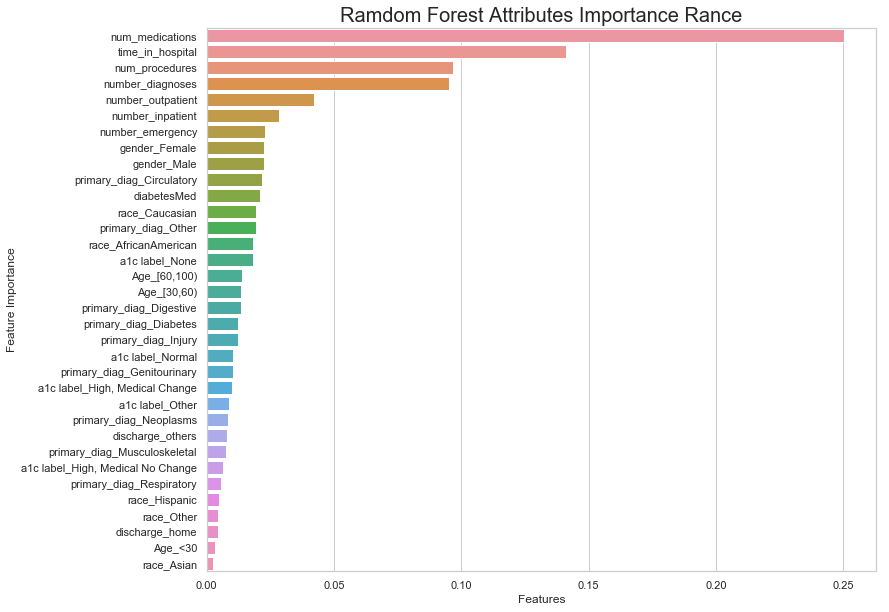

In [49]:
# Plot the importance
plt.figure(figsize=(12,10))
indice = np.argsort(model_RF.best_estimator_.feature_importances_)[::-1]
sns.barplot(model_RF.best_estimator_.feature_importances_[indice], X_train.columns[indice])
plt.ylabel('Feature Importance', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.title('Ramdom Forest Attributes Importance Rance', fontsize=20)

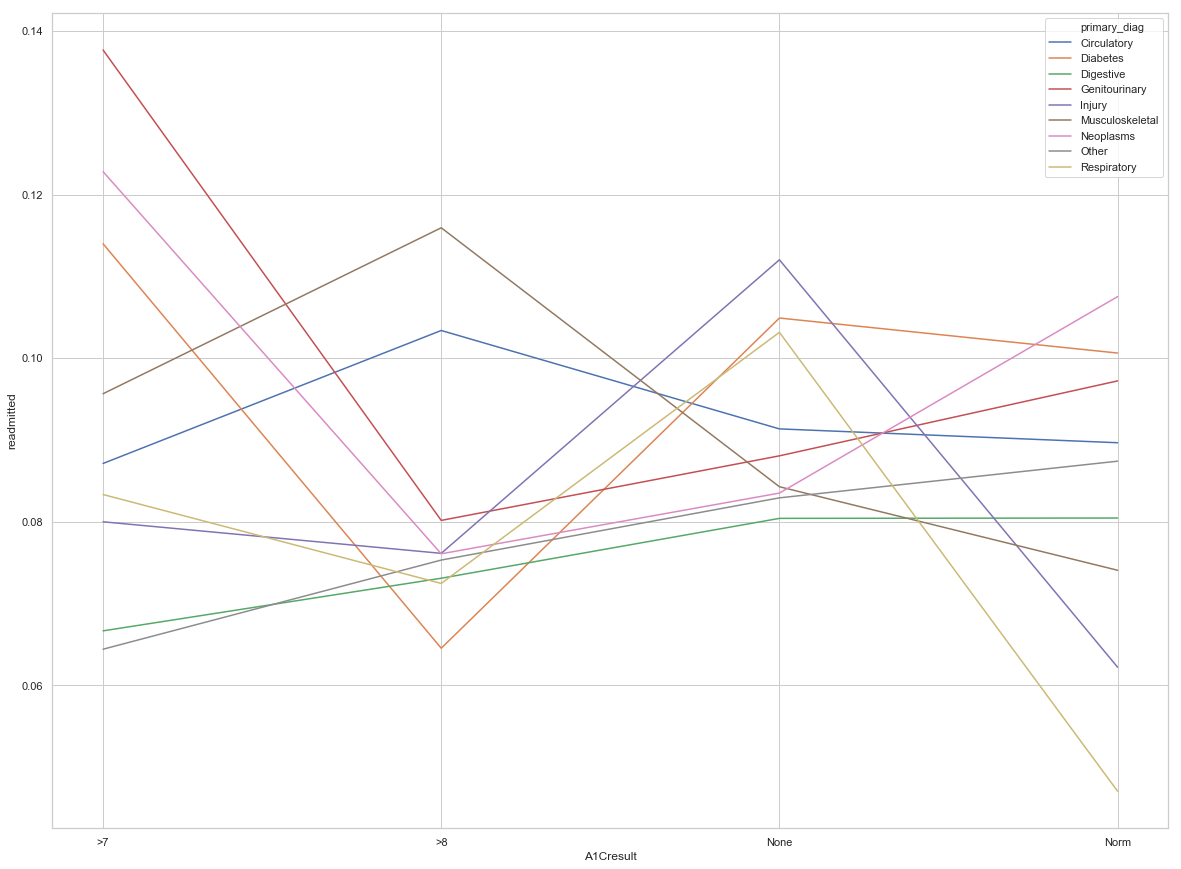

In [51]:
df_a1cDiag3 = pd.DataFrame(df_new.groupby(['primary_diag', 'A1Cresult'])['readmitted'].mean()).reset_index()
plt.figure(figsize=(20,15))
sns.lineplot(x='A1Cresult', y ='readmitted', data=df_a1cDiag3, hue='primary_diag')

In [52]:
df_a1cDiag = pd.DataFrame(df_new.groupby(['primary_diag', 'a1c label'])['readmitted'].mean()).reset_index()
df_a1cDiag.head()

,primary_diag,a1c label,readmitted
0,Circulatory,"High, Medical Change",0.109155
1,Circulatory,"High, Medical No Change",0.093082
2,Circulatory,None,0.091356
3,Circulatory,Normal,0.089665
4,Circulatory,Other,0.087130


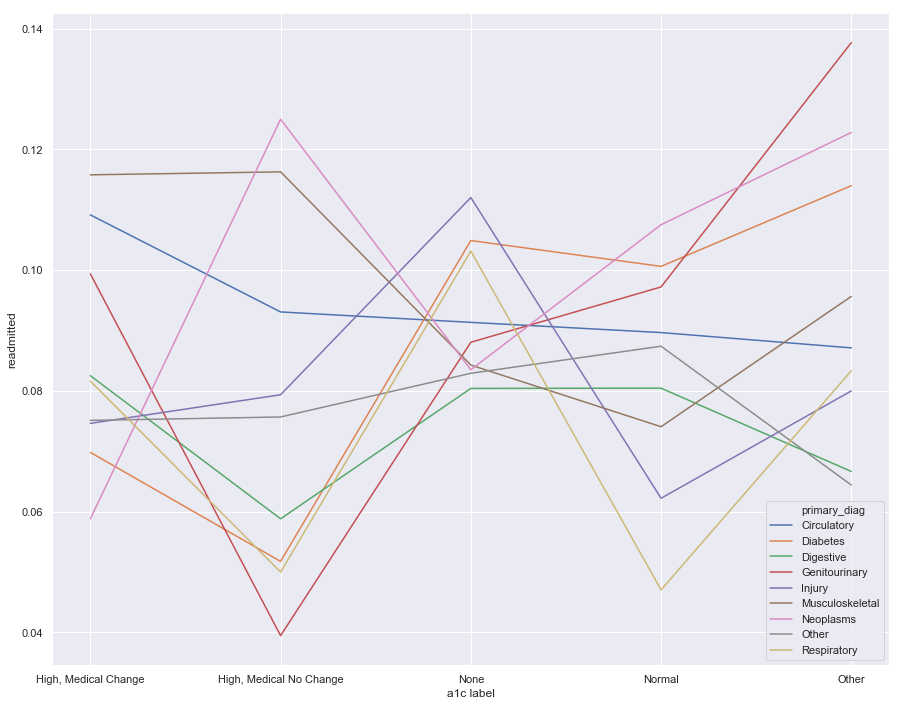

In [53]:
plt.figure(figsize=(15,12))
sns.set()
sns.lineplot(x='a1c label', y ='readmitted', data=df_a1cDiag, hue='primary_diag')

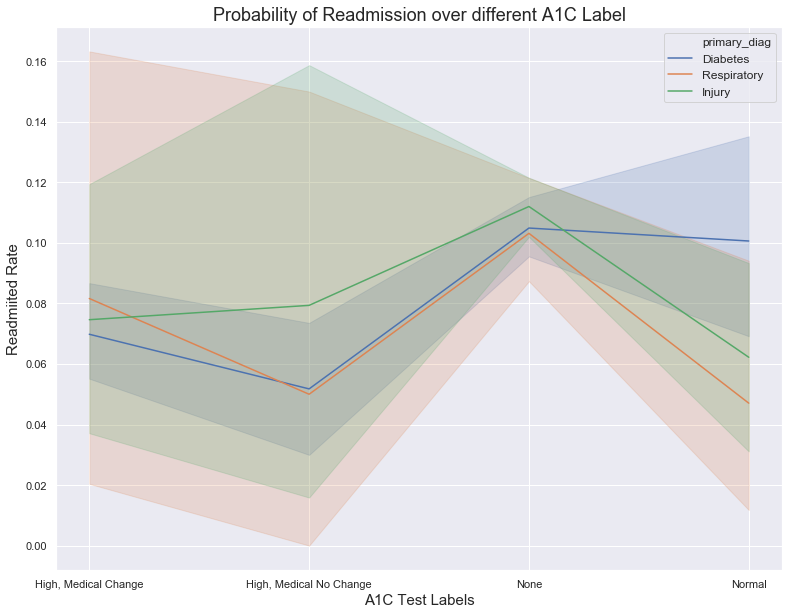

In [54]:
diags = ['Diabetes', 'Respiratory', 'Injury']
plt.figure(figsize=(13,10))
df_a1cDiag2 = df_new[df_new['primary_diag'].isin(diags)]
df_a1cDiag2 = df_a1cDiag2[df_a1cDiag2['a1c label']!='Other']
sns.lineplot(x='a1c label', y ='readmitted', data=df_a1cDiag2, hue='primary_diag')
plt.xlabel('A1C Test Labels', fontsize=15)
plt.ylabel("Readmiited Rate" ,fontsize=15)
plt.title('Probability of Readmission over different A1C Label', fontsize=18)
plt.legend(fontsize=12)

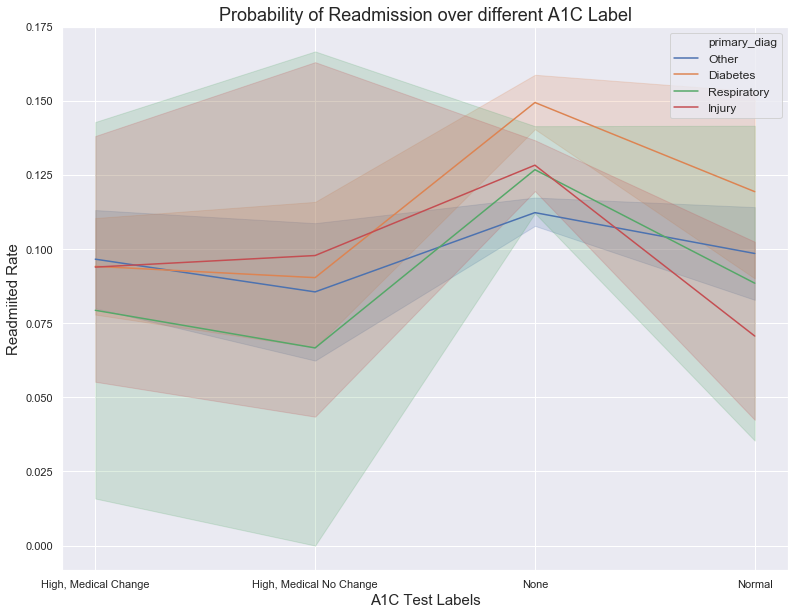

In [55]:
df_clean_og['a1c label'] =df_clean_og.apply (lambda row: label_a1c(row),axis=1)
df_clean_og['readmitted'].replace('<30', 1, inplace=True)
df_clean_og['readmitted'].replace(['NO', '>30'], 0, inplace=True)
df_clean_og['primary_diag'] =df_clean_og['diag_1'].map(label_diagnosis)

diags = ['Diabetes', 'Respiratory', 'Injury', 'Other']
plt.figure(figsize=(13,10))
df_a1cDiag2_OG = df_clean_og[df_clean_og['primary_diag'].isin(diags)]
df_a1cDiag2_OG = df_a1cDiag2_OG[df_a1cDiag2_OG['a1c label']!='Other']
sns.lineplot(x='a1c label', y ='readmitted', data=df_a1cDiag2_OG, hue='primary_diag')
plt.xlabel('A1C Test Labels', fontsize=15)
plt.ylabel("Readmiited Rate" ,fontsize=15)
plt.title('Probability of Readmission over different A1C Label', fontsize=18)
plt.legend(fontsize=12)

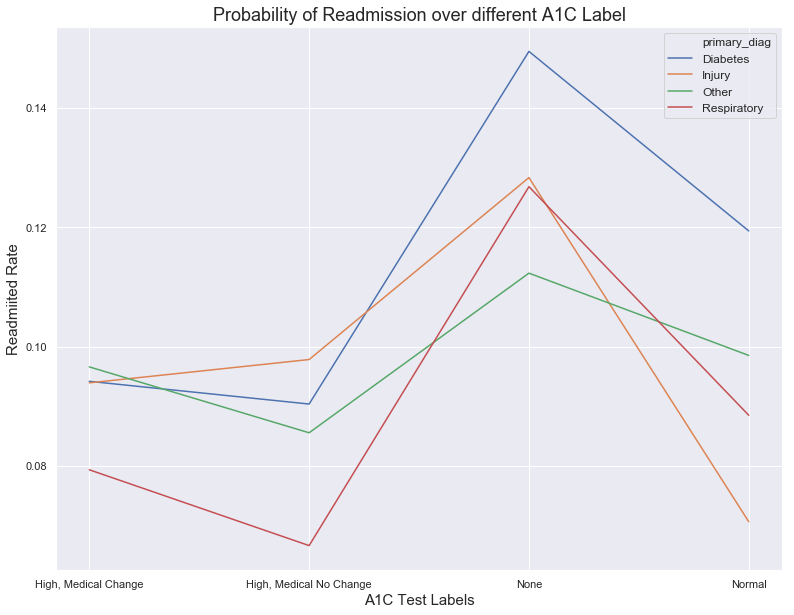

In [56]:
#df_a1cDiag3_OG = pd.DataFrame(df_clean_og.groupby(['primary_diag', 'a1c label'])['readmitted'].mean()).reset_index()
df_a1cDiag3_OG = pd.DataFrame(df_clean_og.groupby(['primary_diag', 'a1c label'])['readmitted'].mean()).reset_index()
df_a1cDiag3_OG = df_a1cDiag3_OG[df_a1cDiag3_OG['primary_diag'].isin(diags)]
df_a1cDiag3_OG = df_a1cDiag3_OG[df_a1cDiag3_OG['a1c label']!='Other']
plt.figure(figsize=(13,10))
sns.lineplot(x='a1c label', y ='readmitted', data=df_a1cDiag3_OG, hue='primary_diag')
plt.xlabel('A1C Test Labels', fontsize=15)
plt.ylabel("Readmiited Rate" ,fontsize=15)
plt.title('Probability of Readmission over different A1C Label', fontsize=18)
plt.legend(fontsize=12)

In [57]:
df_clean_og['primary_diag'].value_counts()

Circulatory        37253
Other              21946
Digestive           8921
Diabetes            7965
Injury              6676
Genitourinary       4947
Musculoskeletal     4739
Neoplasms           3279
Respiratory         2327
Name: primary_diag, dtype: int64